In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [11]:
import pandas as pd

df = pd.read_excel('/Users/andreasbrogaard/Documents/dsp_project/dsp_project/Data Collection/gpt_response_clean.xlsx')

#df_train = df[['Type', 'Ask.price', 'Year_built', 'Energy_rating', 'Monthly_ownership_cost', 'Days_desc', 'Municipality', 'Rooms', 'Monthly_ownership_cost.1', 'Location', '#Bathrooms', 'Cond.house', 'View', 'Balcony', 'Garden', 'Parking', 'Swimming pool', 'Fireplace', 'Garage', 'Basement', 'Elevator', 'Air_conditioning', 'Heating_type']]
df = df[['Type', 'Ask.price', 'Year_built', 'Energy_rating', 'Monthly_ownership_cost', 'Days_desc', 'Municipality', 'Rooms', 'Location', '#Bathrooms', 'Cond.house', 'View', 'Balcony', 'Garden', 'Parking', 'Swimming pool', 'Fireplace', 'Garage', 'Basement', 'Elevator', 'Air_conditioning', 'Heating_type']]
df.head()




,Type,Ask.price,Year_built,Energy_rating,Monthly_ownership_cost,Days_desc,Municipality,Rooms,Location,#Bathrooms,...,Balcony,Garden,Parking,Swimming pool,Fireplace,Garage,Basement,Elevator,Air_conditioning,Heating_type
0,Villa,2499000,1911.0,D,2466,51-100,Tranbjerg J,3.0,rural,1-1.5 bathrooms,...,True,True,True,False,True,True,False,False,False,not_stated
1,Ejerlejlighed,3495000,1930.0,D,3918,21-50,Aarhus C,3.0,downtown,1-1.5 bathrooms,...,False,False,False,False,False,False,False,False,False,not_stated
2,Villa,2748000,1970.0,D,2638,100+,Tilst,4.0,suburban,2-2.5 bathrooms,...,False,True,True,False,False,False,False,False,False,not_stated
3,Villa,3650000,1900.0,A2010,3204,1-10,Solbjerg,4.0,suburban,2-2.5 bathrooms,...,False,True,False,False,True,False,False,False,False,not_stated
4,Ejerlejlighed,1199000,1970.0,B,2050,1-10,Viby J,2.0,urban,1-1.5 bathrooms,...,False,False,False,False,False,False,False,False,False,not_stated


In [12]:
na_rows = df[df.isna().any(axis=1)]
na_indices = na_rows.index.tolist()
print("NA rows:")
print(na_rows)
print("NA row indices:")
print(na_indices)

df.dropna(inplace=True)


NA rows:
            Type  Ask.price  Year_built Energy_rating  Monthly_ownership_cost  \
32   Helårsgrund    2995000         NaN           NaN                    1270   
86    Fritidshus    3198000      1981.0           NaN                    2889   
119  Helårsgrund    2295000         NaN           NaN                     448   
120  Helårsgrund    2295000         NaN           NaN                     454   
121  Helårsgrund    2295000         NaN           NaN                     537   
143   Fritidshus    7998000      1986.0           NaN                    3691   
163  Helårsgrund    2498000         NaN           NaN                    1045   
184   Fritidshus    3198000      1964.0           NaN                    2877   

    Days_desc Municipality  Rooms  Location       #Bathrooms  ... Balcony  \
32      11-20     Højbjerg    NaN  suburban  1-1.5 bathrooms  ...   False   
86     51-100          Egå    3.0  suburban  1-1.5 bathrooms  ...   False   
119    51-100  Tranbjerg J    

In [13]:
df.info()
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
Index: 189 entries, 0 to 196
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Type                    189 non-null    object 
 1   Ask.price               189 non-null    int64  
 2   Year_built              189 non-null    float64
 3   Energy_rating           189 non-null    object 
 4   Monthly_ownership_cost  189 non-null    int64  
 5   Days_desc               189 non-null    object 
 6   Municipality            189 non-null    object 
 7   Rooms                   189 non-null    float64
 8   Location                189 non-null    object 
 9   #Bathrooms              189 non-null    object 
 10  Cond.house              189 non-null    object 
 11  View                    189 non-null    object 
 12  Balcony                 189 non-null    bool   
 13  Garden                  189 non-null    bool   
 14  Parking                 189 non-null    bool   

In [14]:
boolean_vars = ['Balcony', 'Garden', 'Parking', 'Swimming pool', 'Fireplace', 'Garage', 'Basement', 'Elevator', 'Air_conditioning', 'Heating_type']

# Make sure 'df' is defined and accessible in the current cell

for var in boolean_vars:
    print(df[var].value_counts())
    print()


Balcony
False    137
True      52
Name: count, dtype: int64

Garden
True     121
False     68
Name: count, dtype: int64

Parking
True     128
False     61
Name: count, dtype: int64

Swimming pool
False    188
True       1
Name: count, dtype: int64

Fireplace
False    161
True      28
Name: count, dtype: int64

Garage
False    133
True      56
Name: count, dtype: int64

Basement
False    140
True      49
Name: count, dtype: int64

Elevator
False    184
True       5
Name: count, dtype: int64

Air_conditioning
False    189
Name: count, dtype: int64

Heating_type
not_stated                     156
Gulvvarme                       12
floor heating                    8
fjernvarme                       2
Radiators                        2
Var­me­gen­vin­dings­an­læg      2
zoneopdelt gulvvarme             1
solar                            1
Radiator                         1
Brændeovn                        1
luft til vand varmepumpe         1
gulvvarme                        1
Floor heating 

<H1> correcting the data types

In [15]:
df['Ask.price'] = pd.to_numeric(df['Ask.price'], errors='coerce')
df['Monthly_ownership_cost'] = pd.to_numeric(df['Monthly_ownership_cost'], errors='coerce')
#df['Time_for_sale'] = df['Time_for_sale'].str.replace(' dage', '').astype(int)
#df['days_for_sale'] = pd.to_numeric(df['days_for_sale'], errors='coerce')
df['Days_desc'] = df['Days_desc'].astype('category')
df['Municipality'] = df['Municipality'].astype('category')
df['Year_built'] = df['Year_built'].astype(int)
df['Rooms'] = df['Rooms'].astype(int)
df['Energy_rating'] = df['Energy_rating'].astype('category')
df['Location'] = df['Location'].astype('category')
df['#Bathrooms'] = df['#Bathrooms'].astype('category')
df['cond.house'] = df['Cond.house'].astype('category')
df['View'] = df['View'].astype('category')

#Rest of the columns are boolean, pandas have already converted them to boolean



NA rows:
                       0         Type  Ask.price  Year_built Energy_rating  \
32        Skovbjergvej 7  Helårsgrund    2995000         NaN           NaN   
86      Under Rønnene 32   Fritidshus    3198000      1981.0           NaN   
119        Østerbyvej 1B  Helårsgrund    2295000         NaN           NaN   
120        Østerbyvej 1A  Helårsgrund    2295000         NaN           NaN   
121        Østerbyvej 1C  Helårsgrund    2295000         NaN           NaN   
143       Havlundsvej 34   Fritidshus    7998000      1986.0           NaN   
163  Onsholtgårdsvej 108  Helårsgrund    2498000         NaN           NaN   
184         Nobilisvej 9   Fritidshus    3198000      1964.0           NaN   

     Monthly_ownership_cost Time_for_sale  days_for_sale Days_desc  \
32                     1270       19 dage             19     11-20   
86                     2889       55 dage             55    51-100   
119                     448       85 dage             85    51-100   
120     

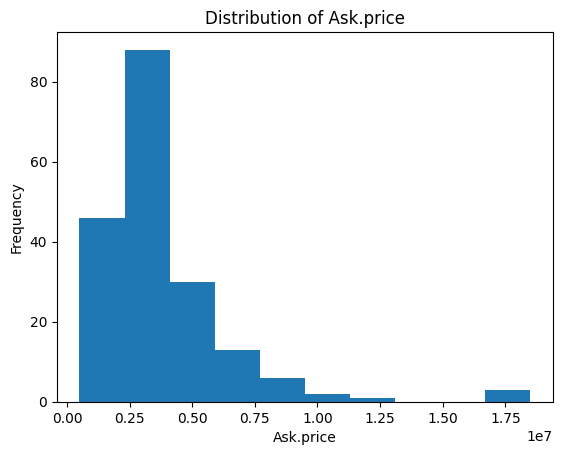

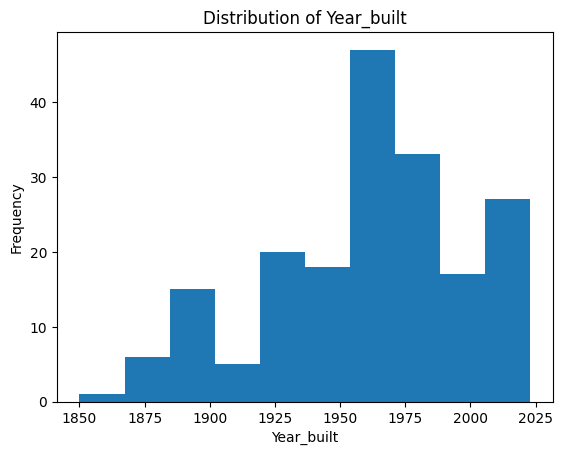

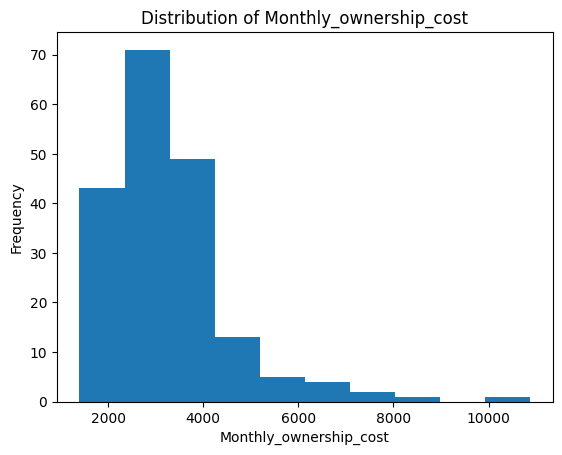

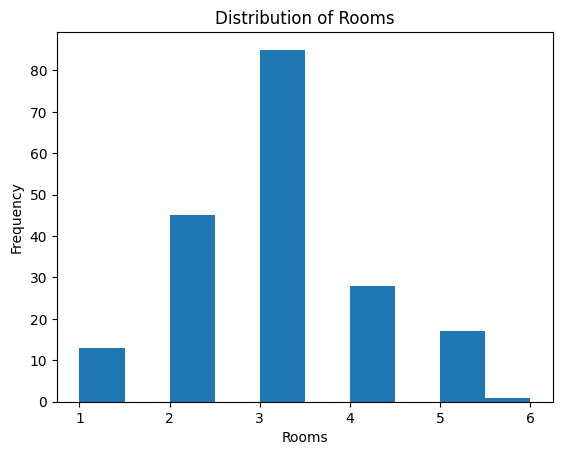

TypeError: no numeric data to plot

In [18]:
import matplotlib.pyplot as plt

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        df[column].plot(kind='hist', bins=10)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {column}')
        plt.show()


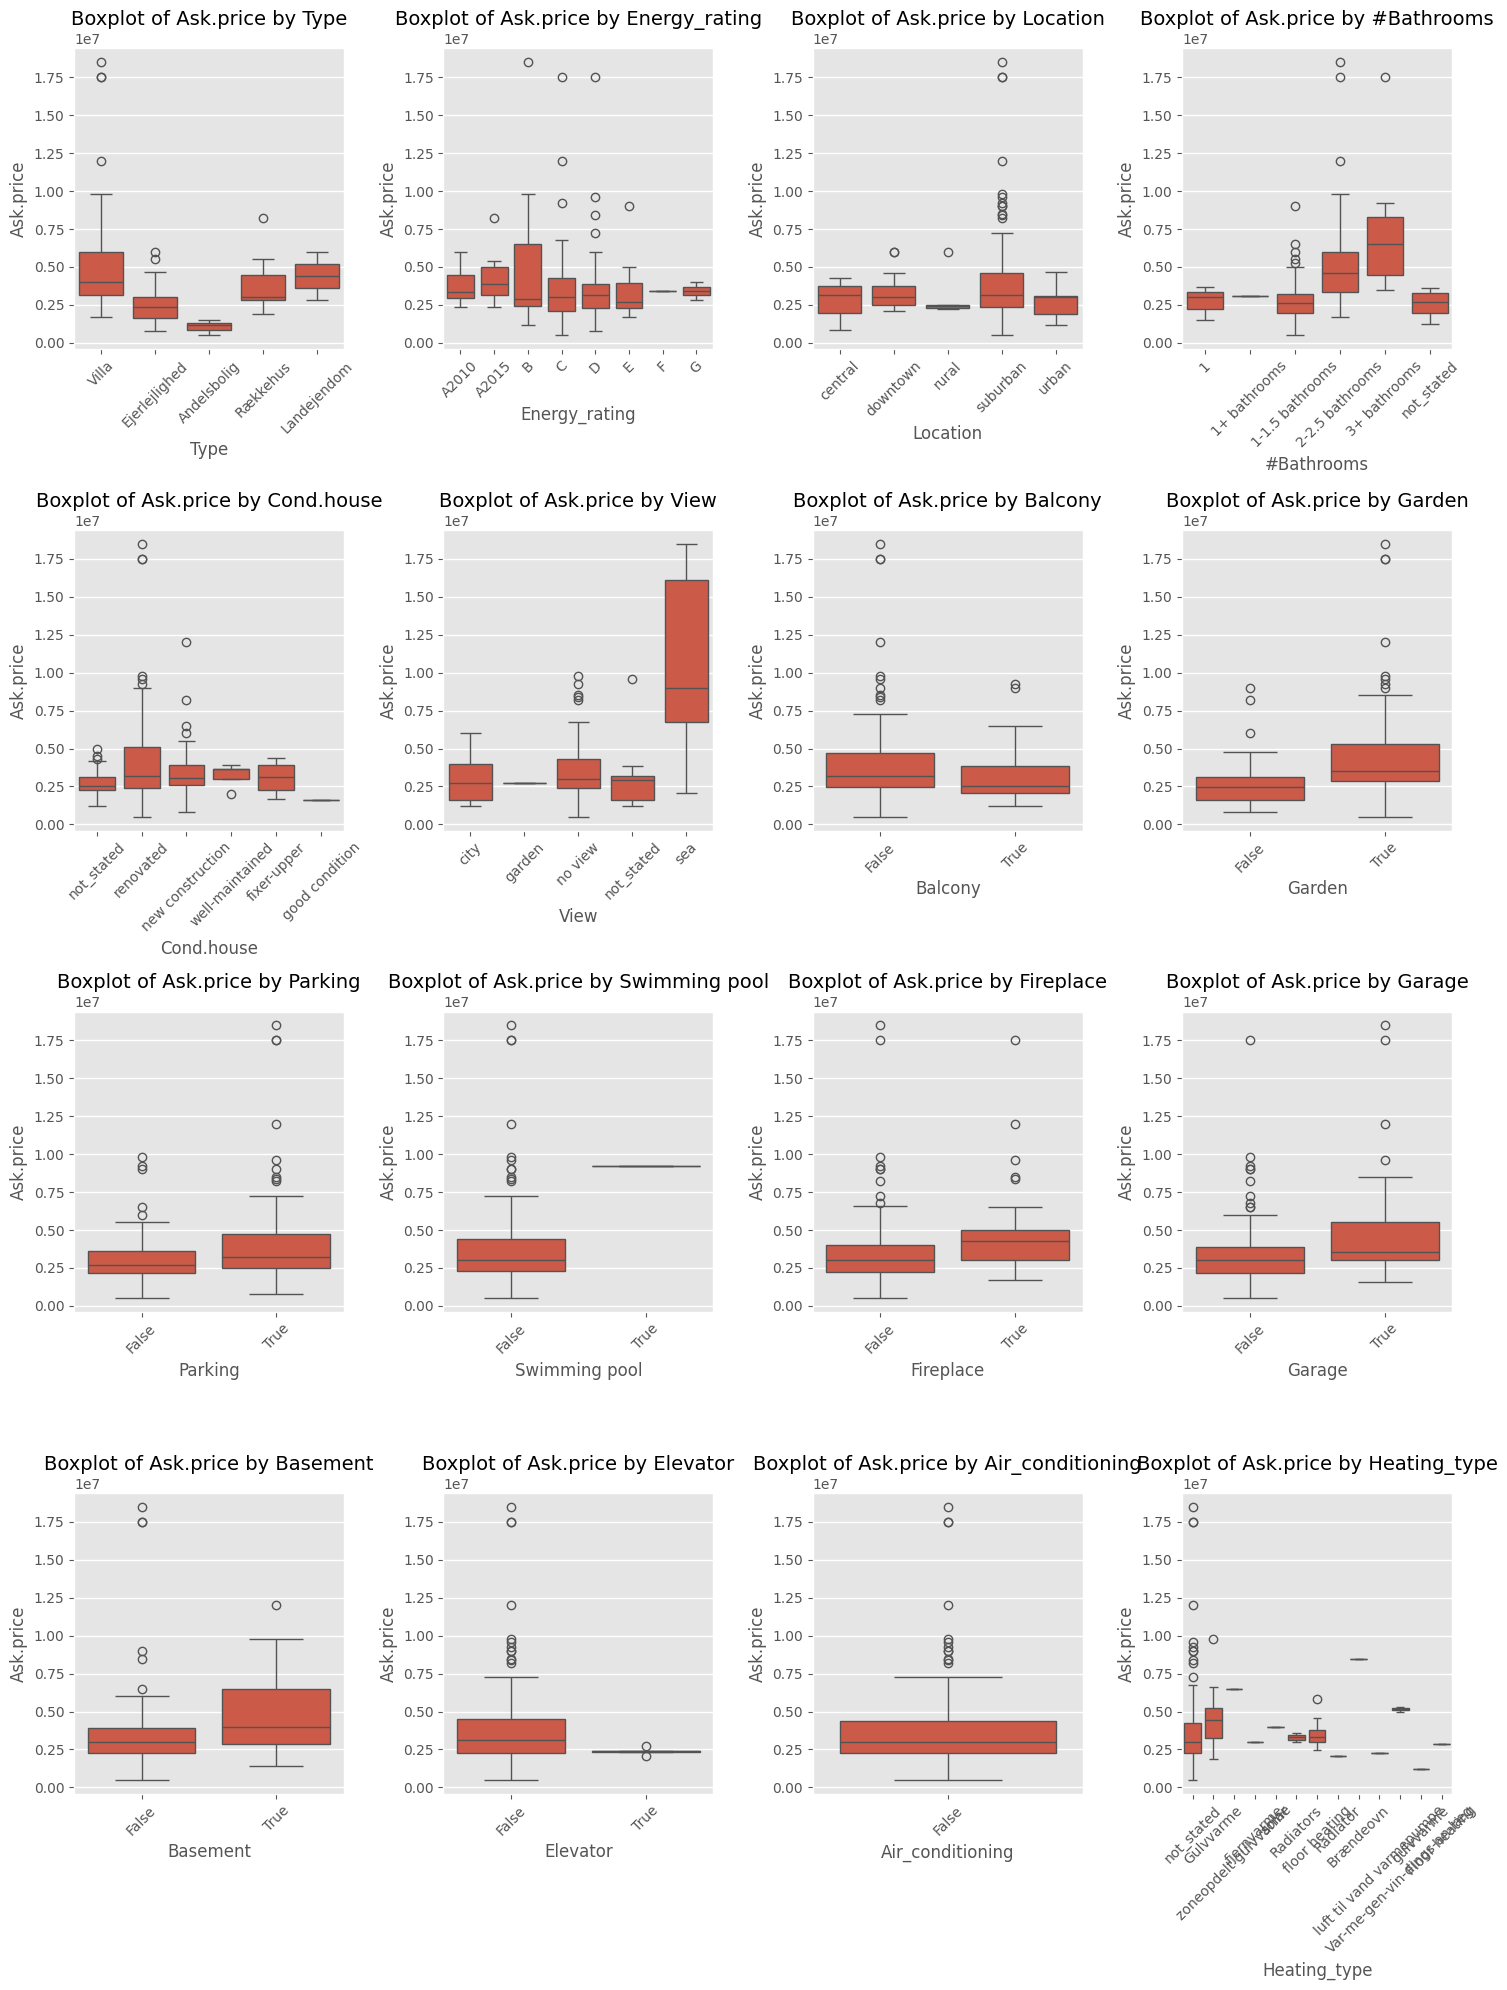

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_vars = ['Type', 'Energy_rating', 'Location', '#Bathrooms', 'Cond.house', 'View', 'Balcony', 'Garden', 'Parking', 'Swimming pool', 'Fireplace', 'Garage', 'Basement', 'Elevator', 'Air_conditioning', 'Heating_type']

num_rows = 4
num_cols = min(len(categorical_vars), 4)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))  # Increase the height of the figure

# Iterate over the categorical variables and create boxplots
for i, var in enumerate(categorical_vars):
    # Calculate the row and column index for the current subplot
    row = i // num_cols
    col = i % num_cols
    
    # Create the boxplot in the current subplot
    sns.boxplot(data=df, x=var, y='Ask.price', ax=axes[row, col])
    axes[row, col].set_xlabel(var, fontsize=12)  # Set font size
    axes[row, col].set_ylabel('Ask.price', fontsize=12)  # Set font size
    axes[row, col].set_title(f'Boxplot of Ask.price by {var}', fontsize=14)  # Set font size
    axes[row, col].tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels


# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


                             Ask.price  Year_built  Monthly_ownership_cost  \
Ask.price                     1.000000   -0.010187                0.827577   
Year_built                   -0.010187    1.000000               -0.065973   
Monthly_ownership_cost        0.827577   -0.065973                1.000000   
Rooms                         0.477160   -0.043521                0.426903   
Monthly_ownership_cost.1      0.648259   -0.081705                0.516167   
...                                ...         ...                     ...   
cond.house_good condition    -0.061339    0.015397               -0.012052   
cond.house_new construction  -0.046740    0.308019               -0.089283   
cond.house_not_stated        -0.133627   -0.011449               -0.133853   
cond.house_renovated          0.173222   -0.193596                0.177772   
cond.house_well-maintained   -0.034525   -0.077880               -0.056777   

                                Rooms  Monthly_ownership_cost.1

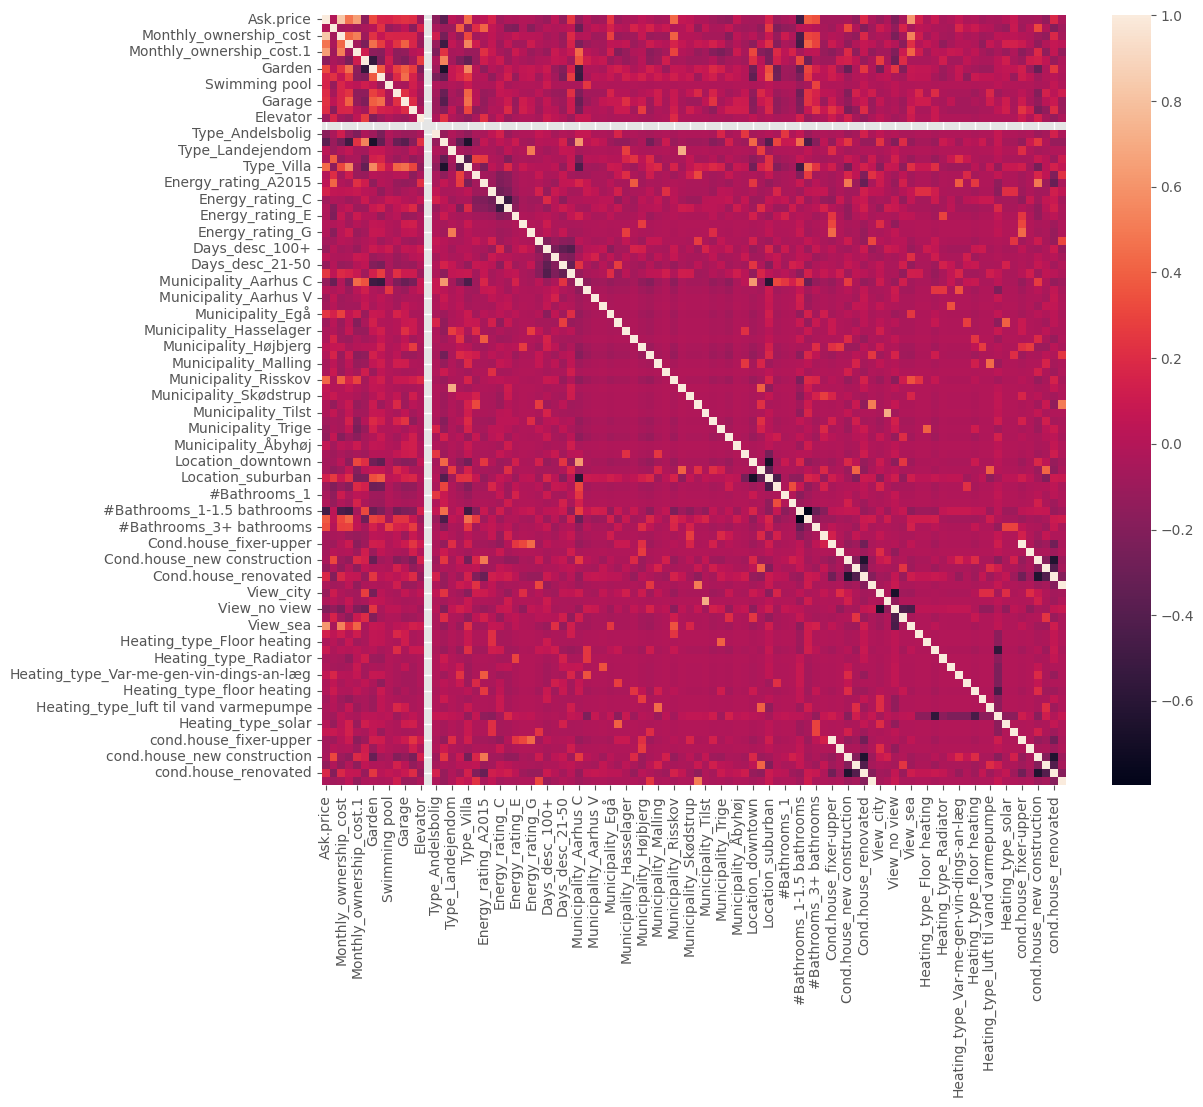

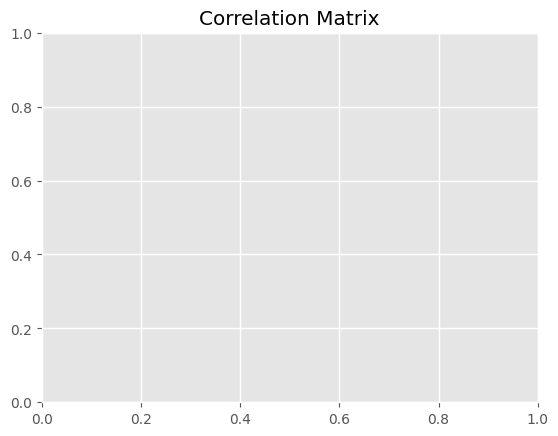

In [143]:

import seaborn as sns
# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df)

# Calculate the correlation matrix
corr_matrix = df_encoded.corr()
print(corr_matrix)

# Plot correlation matrix
plt.figure(figsize=(12, 10))
import matplotlib.pyplot as plt

# Assuming you have a correlation matrix called 'corr_matrix'
sns.heatmap(corr_matrix, annot=False)
plt.show()
plt.title('Correlation Matrix')
plt.show()

high_corr = corr_matrix[(corr_matrix > 0.8) | (corr_matrix < -0.8)]




In [19]:
from sklearn.feature_selection import VarianceThreshold

# Set the threshold for variance
threshold = 0.01

# Create the VarianceThreshold object
selector = VarianceThreshold(threshold=threshold)

df_encoded = pd.get_dummies(df)

# Fit the selector to the data
selector.fit(df_encoded)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Filter the dataframe based on the selected indices
df_filtered = df_encoded.iloc[:, selected_indices]

# Print the filtered dataframe
print(df_filtered)

     Ask.price  Year_built  Monthly_ownership_cost  Rooms  Balcony  Garden  \
0      2499000        1911                    2466      3     True    True   
1      3495000        1930                    3918      3    False   False   
2      2748000        1970                    2638      4    False    True   
3      3650000        1900                    3204      4    False    True   
4      1199000        1970                    2050      2    False   False   
..         ...         ...                     ...    ...      ...     ...   
192    2200000        1872                    2395      3    False    True   
193    2845000        1967                    2156      4    False    True   
194    3395000        1954                    3563      2    False    True   
195    3498000        1960                    3770      5    False    True   
196    2398000        1972                    3339      2     True   False   

     Parking  Fireplace  Garage  Basement  ...  Heating_type_Ra

In [21]:
import numpy as np
import pandas as pd

# Log transformation function
def log_transform(x):
    return np.log(x)

# Apply log transformation to 'Ask.price' and 'Monthly_ownership_cost' columns
df_filtered['Ask.price_log'] = df_filtered['Ask.price'].apply(log_transform)
df_filtered['Monthly_ownership_cost_log'] = df_filtered['Monthly_ownership_cost'].apply(log_transform)

# Print the updated DataFrame
print(df_filtered[['Ask.price', 'Ask.price_log', 'Monthly_ownership_cost', 'Monthly_ownership_cost_log']])




     Ask.price  Ask.price_log  Monthly_ownership_cost  \
0      2499000      14.731401                    2466   
1      3495000      15.066844                    3918   
2      2748000      14.826384                    2638   
3      3650000      15.110238                    3204   
4      1199000      13.996998                    2050   
..         ...            ...                     ...   
192    2200000      14.603968                    2395   
193    2845000      14.861074                    2156   
194    3395000      15.037814                    3563   
195    3498000      15.067702                    3770   
196    2398000      14.690146                    3339   

     Monthly_ownership_cost_log  
0                      7.810353  
1                      8.273337  
2                      7.877776  
3                      8.072155  
4                      7.625595  
..                          ...  
192                    7.781139  
193                    7.676010  
194      